## Лабораторная работа №10. Использование композиций алгоритмов при решении задач машинного обучения.

Используемый набор данных: [Breast Cancer Wisconsin (Diagnostic)](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, roc_auc_score
import os
import requests

%matplotlib inline
pd.options.display.max_columns = None

In [2]:
# Загрузка набора данных
def downloadFile(url, filePath):
    if not os.path.exists(filePath):
        req = requests.get(url)
        f = open(filePath, "wb")
        f.write(req.content)
        f.close

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/"
downloadFile(url + "/wdbc.data", "dataset/wdbc.data")
downloadFile(url + "/wdbc.names", "dataset/wdbc.names")

In [3]:
headers = ["ID", "Diagnosis", "Radius Mean", "Texture Mean", "Perimeter Mean", "Area Mean", "Smoothness Mean",
           "Compactness Mean", "Concavity Mean", "Concave points Mean", "Symmetry Mean", "Fractal dimension Mean",
           "Radius SE", "Texture SE", "Perimeter SE", "Area SE", "Smoothness SE", "Compactness SE", "Concavity SE",
           "Concave points SE", "Symmetry SE", "Fractal dimension SE", "Radius Worst", "Texture Worst", "Perimeter Worst",
           "Area Worst", "Smoothness Worst", "Compactness Worst", "Concavity Worst", "Concave points Worst",
           "Symmetry Worst", "Fractal dimension Worst"]  
data = pd.read_csv("dataset/wdbc.data", names=headers)
data = data.astype({"Diagnosis": "category"})
data.drop(columns=['ID'], inplace=True)
data.sample(20)

,Diagnosis,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Concave points Mean,Symmetry Mean,Fractal dimension Mean,Radius SE,Texture SE,Perimeter SE,Area SE,Smoothness SE,Compactness SE,Concavity SE,Concave points SE,Symmetry SE,Fractal dimension SE,Radius Worst,Texture Worst,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave points Worst,Symmetry Worst,Fractal dimension Worst
447,B,14.800,17.66,95.88,674.8,0.09179,0.08890,0.040690,0.022600,0.1893,0.05886,0.2204,0.6221,1.482,19.750,0.004796,0.011710,0.017580,0.006897,0.02254,0.001971,16.430,22.74,105.90,829.5,0.12260,0.18810,0.20600,0.08308,0.3600,0.07285
415,B,11.890,21.17,76.39,433.8,0.09773,0.08120,0.025550,0.021790,0.2019,0.06290,0.2747,1.2030,1.930,19.530,0.009895,0.030530,0.016300,0.009276,0.02258,0.002272,13.050,27.21,85.09,522.9,0.14260,0.21870,0.11640,0.08263,0.3075,0.07351
565,M,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.097910,0.1752,0.05533,0.7655,2.4630,5.203,99.040,0.005769,0.024230,0.039500,0.016780,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
552,B,12.770,29.43,81.35,507.9,0.08276,0.04234,0.019970,0.014990,0.1539,0.05637,0.2409,1.3670,1.477,18.760,0.008835,0.012330,0.013280,0.009305,0.01897,0.001726,13.870,36.00,88.10,594.7,0.12340,0.10640,0.08653,0.06498,0.2407,0.06484
517,M,19.890,20.26,130.50,1214.0,0.10370,0.13100,0.141100,0.094310,0.1802,0.06188,0.5079,0.8737,3.654,59.700,0.005089,0.023030,0.030520,0.011780,0.01057,0.003391,23.730,25.23,160.50,1646.0,0.14170,0.33090,0.41850,0.16130,0.2549,0.09136
368,M,21.710,17.25,140.90,1546.0,0.09384,0.08562,0.116800,0.084650,0.1717,0.05054,1.2070,1.0510,7.733,224.100,0.005568,0.011120,0.020960,0.011970,0.01263,0.001803,30.750,26.44,199.50,3143.0,0.13630,0.16280,0.28610,0.18200,0.2510,0.06494
66,B,9.465,21.01,60.11,269.4,0.10440,0.07773,0.021720,0.015040,0.1717,0.06899,0.2351,2.0110,1.660,14.200,0.010520,0.017550,0.017140,0.009333,0.02279,0.004237,10.410,31.56,67.03,330.7,0.15480,0.16640,0.09412,0.06517,0.2878,0.09211
227,B,15.000,15.51,97.45,684.5,0.08371,0.10960,0.065050,0.037800,0.1881,0.05907,0.2318,0.4966,2.276,19.880,0.004119,0.032070,0.036440,0.011550,0.01391,0.003204,16.410,19.31,114.20,808.2,0.11360,0.36270,0.34020,0.13790,0.2954,0.08362
449,M,21.100,20.52,138.10,1384.0,0.09684,0.11750,0.157200,0.115500,0.1554,0.05661,0.6643,1.3610,4.542,81.890,0.005467,0.020750,0.031850,0.014660,0.01029,0.002205,25.680,32.07,168.20,2022.0,0.13680,0.31010,0.43990,0.22800,0.2268,0.07425
365,M,20.440,21.78,133.80,1293.0,0.09150,0.11310,0.097990,0.077850,0.1618,0.05557,0.5781,0.9168,4.218,72.440,0.006208,0.019060,0.023750,0.014610,0.01445,0.001906,24.310,26.37,161.20,1780.0,0.13270,0.23760,0.27020,0.17650,0.2609,0.06735


In [4]:
display(data.describe())
display(data.isna().sum())

,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Concave points Mean,Symmetry Mean,Fractal dimension Mean,Radius SE,Texture SE,Perimeter SE,Area SE,Smoothness SE,Compactness SE,Concavity SE,Concave points SE,Symmetry SE,Fractal dimension SE,Radius Worst,Texture Worst,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave points Worst,Symmetry Worst,Fractal dimension Worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Diagnosis                  0
Radius Mean                0
Texture Mean               0
Perimeter Mean             0
Area Mean                  0
Smoothness Mean            0
Compactness Mean           0
Concavity Mean             0
Concave points Mean        0
Symmetry Mean              0
Fractal dimension Mean     0
Radius SE                  0
Texture SE                 0
Perimeter SE               0
Area SE                    0
Smoothness SE              0
Compactness SE             0
Concavity SE               0
Concave points SE          0
Symmetry SE                0
Fractal dimension SE       0
Radius Worst               0
Texture Worst              0
Perimeter Worst            0
Area Worst                 0
Smoothness Worst           0
Compactness Worst          0
Concavity Worst            0
Concave points Worst       0
Symmetry Worst             0
Fractal dimension Worst    0
dtype: int64

Пропусков в данных нет.

### Алгоритм "[Случайный лес](https://ru.wikipedia.org/wiki/Random_forest)"

In [5]:
X = data.drop(columns=["Diagnosis"]).copy()
y = data["Diagnosis"].copy().cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

Определим, при каком числе деревьев качество модели на кросс-валидации максимально.

In [6]:
params = {"n_estimators": np.arange(10, 201, 1)}
clf_rfc = GridSearchCV(RandomForestClassifier(), params, n_jobs=5)
clf_rfc.fit(X_train, y_train)
clf_rfc.best_params_

{'n_estimators': 51}

Определим, какое минимальное число деревьев дает качество на кросс-валидации свыше 60%.

In [7]:
idx = np.where(clf_rfc.cv_results_["mean_test_score"] >= 0.6)[0]
if len(idx) > 0:
    display(clf_rfc.cv_results_["params"][idx[0]])

{'n_estimators': 10}

Вычислим и построим ROC-кривую

In [8]:
def calc_plot_roc(clf, X_test, y_test, classes):
    n_classes = len(classes)
    y_pred = clf.predict(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = "AUC = %0.2f"%auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

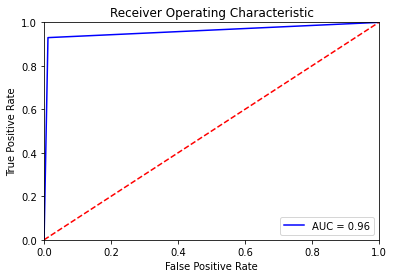

In [9]:
classes = data["Diagnosis"].unique()
calc_plot_roc(clf_rfc, X_test, y_test, classes)

### Алгоритм "[Градиентный бустинг](https://en.wikipedia.org/wiki/Gradient_boosting)"

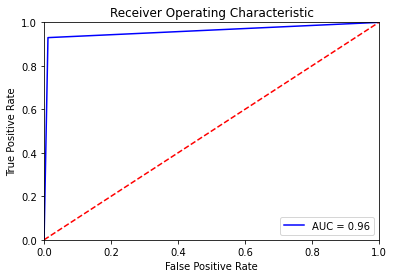

In [10]:
clf_gbc = GradientBoostingClassifier()
clf_gbc.fit(X_train, y_train)
calc_plot_roc(clf_rfc, X_test, y_test, classes)